In [3]:
from SeismicReduction import *
import pickle
import torch.nn as nn

# load data
file_pi2 = open('./pickled/data.pickle', 'rb')
dataholder = pickle.load(file_pi2)
file_pi2.close()

In [5]:
### Processor
processor = Processor(dataholder)
input1 = processor(flatten=[True, 12, 52], normalise=True)

Processor has created an output with shape:  (25351, 2, 64)


In [6]:
bvae = BVaeModel(input1)


ModelAgent initialised


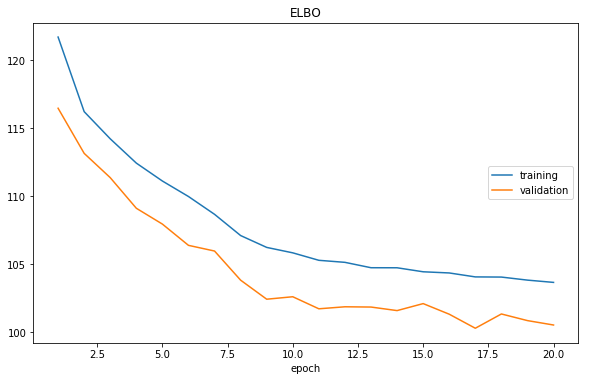

ELBO:
training   (min:  103.660, max:  121.702, cur:  103.660)
validation (min:  100.289, max:  116.467, cur:  100.526)


In [7]:
bvae.reduce(epochs=20, hidden_size=8, lr=0.01, beta=1, plot_loss=True)

# Run UMAP params:

In [ ]:
import copy

neighbours = [4, 10, 50, 100]
dists = [0.0001, 0.001, 0.01, 0.2]

# neighbours = [4, 10] #50, 100]
# dists = [0.0001, 0.001] #, 0.01, 0.2]

models = [[i for i in range(len(dists))] for i in range(len(neighbours))]

for i in range(len(neighbours)):
    for j in range(len(dists)):
        bvae.to_2d(umap_neighbours=neighbours[i], umap_dist=dists[j])
        models[i][j] = copy.deepcopy(bvae)
        print(i, j)
        



2D UMAP representation of beta_VAE embedding initialised:
	Input dimension: (25351, 8)
	2-D UMAP representation complete

0 0

2D UMAP representation of beta_VAE embedding initialised:
	Input dimension: (25351, 8)


/anaconda3/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 3 separate connected components using meta-embedding (experimental)
  n_components


	2-D UMAP representation complete

0 1

2D UMAP representation of beta_VAE embedding initialised:
	Input dimension: (25351, 8)
	2-D UMAP representation complete

0 2

2D UMAP representation of beta_VAE embedding initialised:
	Input dimension: (25351, 8)
	2-D UMAP representation complete

0 3

2D UMAP representation of beta_VAE embedding initialised:
	Input dimension: (25351, 8)
	2-D UMAP representation complete

1 0

2D UMAP representation of beta_VAE embedding initialised:
	Input dimension: (25351, 8)
	2-D UMAP representation complete

1 1

2D UMAP representation of beta_VAE embedding initialised:
	Input dimension: (25351, 8)
	2-D UMAP representation complete

1 2

2D UMAP representation of beta_VAE embedding initialised:
	Input dimension: (25351, 8)
	2-D UMAP representation complete

1 3

2D UMAP representation of beta_VAE embedding initialised:
	Input dimension: (25351, 8)
	2-D UMAP representation complete

2 0

2D UMAP representation of beta_VAE embedding initialised:
	Input dimens

# Run plots

In [ ]:
def plot_agent(model, attr='FF', ax=False):
    ax.set(#xlabel='Latent Variable 1',
#            ylabel='Latent Variable 2',
#            title='Model used: {}, Trace Attribute: {}'.format(
#                model.name, attr),
           aspect='equal') #, xlim=(-15,15), ylim=(-15,15))
    scatter = ax.scatter(model.two_dimensions[:, 0],
                         model.two_dimensions[:, 1],
                         s=0.5,
                         c=model.attributes[attr])
    return


# axes are in a two-dimensional array, indexed by [row, col]
fig, ax = plt.subplots(len(neighbours), len(dists), sharex='col', sharey='row', figsize=(18, 18), 
                       gridspec_kw={'hspace': 0, 'wspace': 0})
fig.tight_layout()
fig.suptitle('UMAP parameter investigation')

print(models)

for i in range(len(neighbours)):
    for j in range(len(dists)):
        plot_agent(model=models[i][j], ax=ax[i, j])

for ax in fig.get_axes():
    ax.label_outer()
    
plt.show()